In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Cartella contenente i root files
folder_10MeV = "/home/ubuntu/SMRR/Esercizi/Task2/task2a/Results_10GeV/"
folder_100MeV = "/home/ubuntu/SMRR/Esercizi/Task2/task2a/Results_100MeV/"

# Prende tutti i file .root nella cartella
root_files_10 = glob.glob(os.path.join(folder_10MeV, "*.root"))
root_files_100 = glob.glob(os.path.join(folder_100MeV, "*.root"))

angles = np.arange(0, 190, 10)
mean_signals_10, means_Energy_10, means_pos_10 = [],[], []
mean_signals_100, means_Energy_100, means_pos_100 = [],[], []

for file in root_files_10: 
    with uproot.open(file) as f:
        # Prendi il primo TTree trovato nel file
        tree_name = list(f.keys())[0]
        tree = f[tree_name]
        
        # Leggi il branch signal2
        signal2 = tree["signal2"].array(library="np")
        mean_signals_10.append(np.mean(signal2, axis=0))
        signal2 = tree["truthE1"].array(library="np")
        means_Energy_10.append(np.mean(signal2, axis=0)) 
        signal2 = tree["truthPos1"].array(library="np")
        means_pos_10.append(np.mean(signal2, axis=0))

for file in root_files_100: 
    with uproot.open(file) as f:
        # Prendi il primo TTree trovato nel file
        tree_name = list(f.keys())[0]
        tree = f[tree_name]
        
        # Leggi il branch signal2
        signal2 = tree["signal2"].array(library="np")
        strips = np.arange(len(signal2))
        mean_signals_100.append(np.mean(signal2, axis=0))
        signal2 = tree["truthE1"].array(library="np")
        means_Energy_100.append(np.mean(signal2, axis=0)) 
        signal2 = tree["truthPos1"].array(library="np")
        means_pos_100.append(np.mean(signal2, axis=0))

In [3]:
strips = np.linspace(1,48,48)

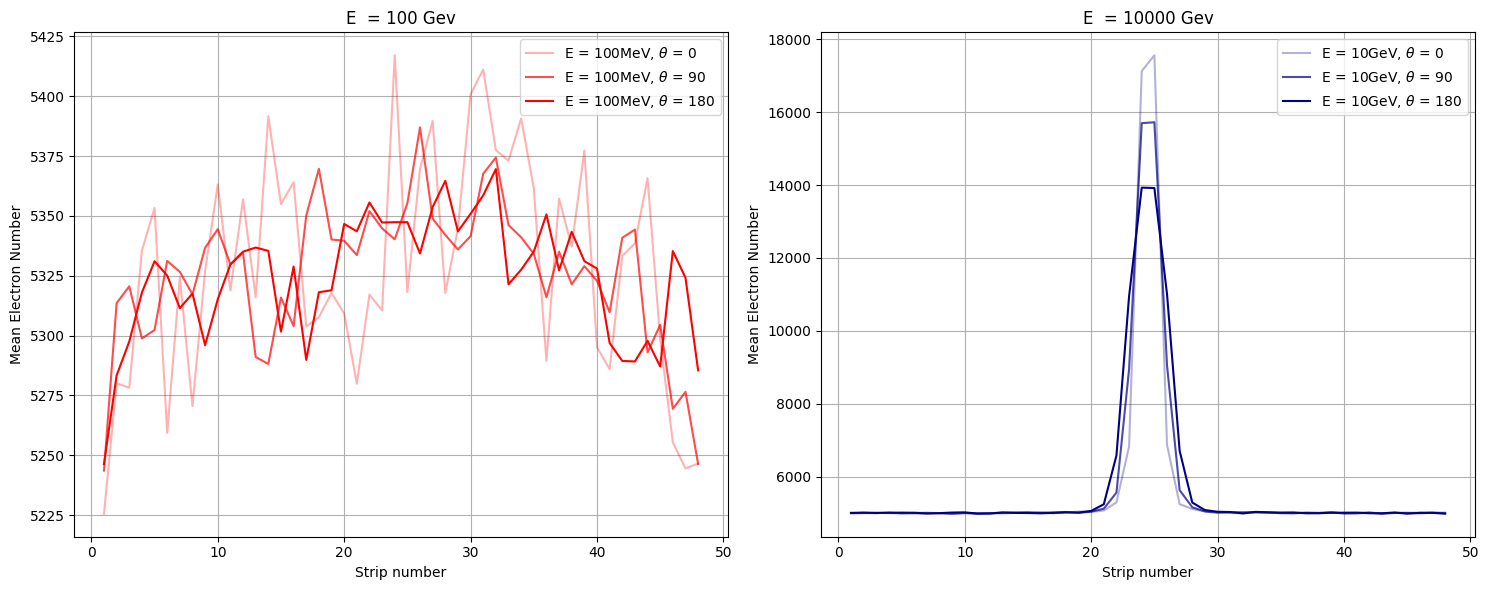

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[1].plot(strips, mean_signals_10[0], label=r'E = 10GeV, $\theta$ = 0', color='navy', alpha=0.3)
axs[0].plot(strips, mean_signals_100[0], label=r'E = 100MeV, $\theta$ = 0', color='r', alpha=0.3)
axs[1].plot(strips, mean_signals_10[9], label=r'E = 10GeV, $\theta$ = 90', color='navy', alpha=0.7)
axs[0].plot(strips, mean_signals_100[9], label=r'E = 100MeV, $\theta$ = 90', color='r', alpha=0.7)
axs[1].plot(strips, mean_signals_10[-1], label=r'E = 10GeV, $\theta$ = 180', color='navy')
axs[0].plot(strips, mean_signals_100[-1], label=r'E = 100MeV, $\theta$ = 180', color='red')
for i in range(2):
    axs[i].set_xlabel("Strip number")
    axs[i].set_ylabel("Mean Electron Number")
    axs[i].legend(loc='upper right')
    if i==0:
        E = 100
    else:
        E = 10000
    axs[i].set_title(f"E  = {E} Gev")
    axs[i].grid()
plt.tight_layout()

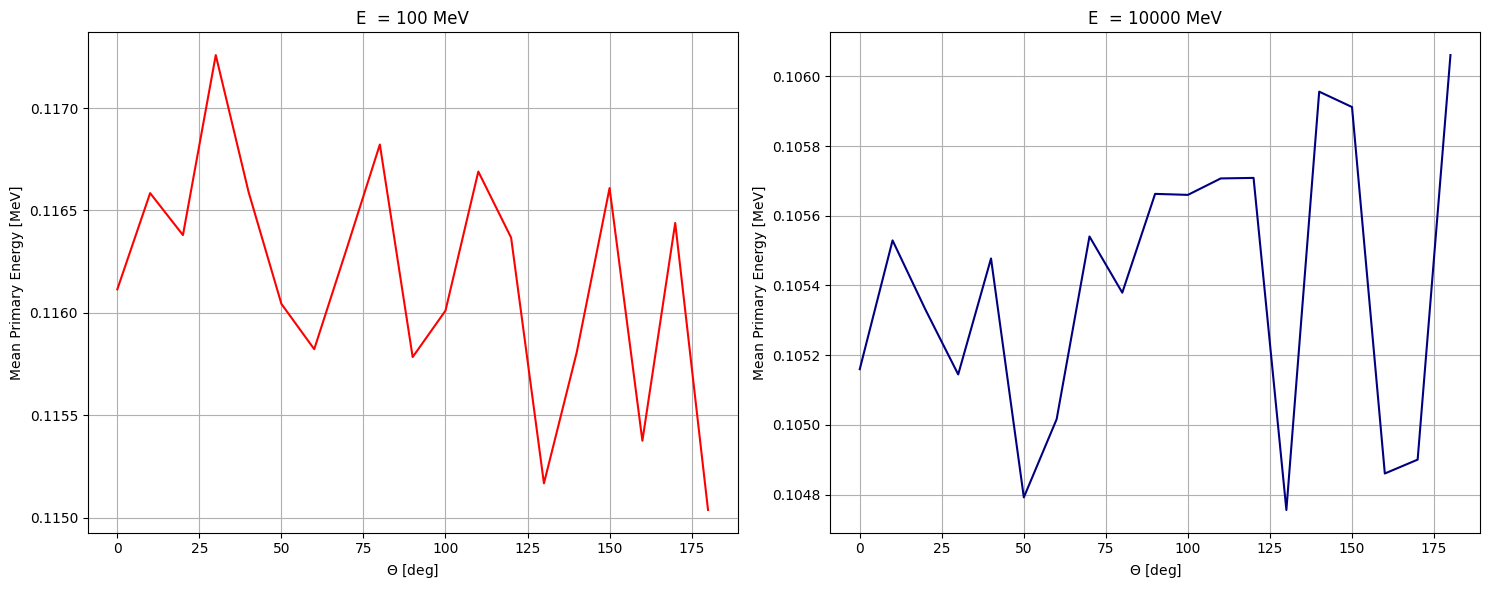

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[1].plot(angles, means_Energy_10, label=r'E = 10GeV, $\theta$ = 0', color='navy')
axs[0].plot(angles, means_Energy_100, label=r'E = 100MeV, $\theta$ = 0', color='r')
for i in range(2):
    axs[i].set_xlabel(r"$\Theta$ [deg]")
    axs[i].set_ylabel("Mean Primary Energy [MeV]")
    if i==0:
        E = 100
    else:
        E = 10000
    axs[i].set_title(f"E  = {E} MeV")
    axs[i].grid()
plt.tight_layout()

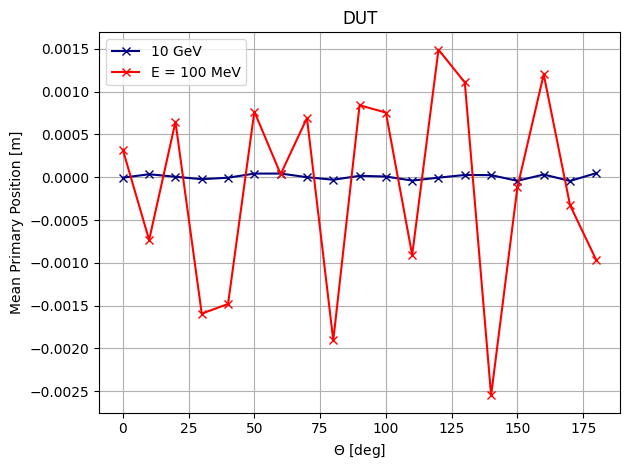

In [6]:
plt.plot(angles, means_pos_10, marker='x',color='navy',alpha=1, label='10 GeV')
plt.plot(angles, means_pos_100, marker='x',color='red',alpha=1, label='E = 100 MeV')
plt.xlabel(r"$\Theta$ [deg]")
plt.ylabel("Mean Primary Position [m]")
plt.legend()
plt.title("DUT")
plt.grid()
plt.tight_layout()